# Scene Part Swap: Repeated Surveys over Several Scene States

Notebook: Hannah Weiser, 2024

This notebook demonstrates how to use the [scene swap feature]() in HELIOS++ both for a terrestrial laser scanning (TLS) and UAV-based laser scanning (ULS) example.
In the HELIOS++ scene XML, swaps can be defined for each scene part, resulting in a sequence of different scene states. HELIOS++ will automatically repeat the survey for each scene state.

We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
from pathlib import Path
from IPython.display import Code
from pyhelios.util.xmldisplayer import display_xml, find_playback_dir
import laspy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os

os.chdir("..")

# TLS 

## Survey

The survey consists of two flight lines from a height of 400 m, placed 200 m apart. The scanner is a Leica ALS-50.

In [3]:
Code(display_xml("./data/surveys/dyn/als_dyn_geom_swap.xml"), language="XML")

<document>
    <survey name="dyn_geom_swap_als" scene="data/scenes/dyn/dyn_geom_swap_scene.xml#dyn_geom_swap_scene" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#leica_als50">
		<leg>
            <platformSettings x="100" y="100.0" z="400" onGround="false" movePerSec_m="5" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanFreq_hz="70" scanAngle_deg="60" trajectoryTimeInterval_s="0.01" />
        </leg>
		<leg>
            <platformSettings x="-100" y="-100.0" z="400" onGround="false" movePerSec_m="5" />
            <scannerSettings active="false" pulseFreq_hz="83000" scanFreq_hz="70" scanAngle_deg="60" />
        </leg>
		<leg>
            <platformSettings x="-100" y="100.0" z="400" onGround="false" movePerSec_m="5" />
            <scannerSettings active="true" pulseFreq_hz="83000" scanFreq_hz="70" scanAngle_deg="60" trajectoryTimeInterval_s="0.01" />
        </leg>
		<leg>
            <platformSettings x="100" y="-100.0" z="400" onGround="false" movePerSec_m="5" />
            <scannerSettings active="false" pulseFreq_hz="83000" scanFreq_hz="70" scanAngle_deg="60" />
        </leg>
    </survey>
</document>

## Scene

The scene consists of three scene parts and has a total of four swaps.
Based on the definition, the output of the loops will be as follows:

**Loop 1**:
1. small cube
2. sphere
3. small cube 2

**Loop 2**:
1. sphere
2. big cube
3. mid cube

**Loop 3**:
1. sphere
2. nothing
3. big cube

**Loop 4**:
1. big cube
2. nothing
3. bigger cube



In [4]:
Code(display_xml("data/scenes/dyn/dyn_geom_swap_scene.xml", "dyn_geom_swap_scene"))

<scene id="dyn_geom_swap_scene" name="DynGeomSwapScene">


		<!-- Ground plane -->
		<!-- ************ -->
		<part id="1">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="120" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="50.0;0;0" />
			</filter>
        </part>




		<!-- Small cube goes sphere for two repetitions then goes big cube -->
		<!-- ************************************************************* -->
		<part id="2">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.75" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-40.0;-50.0;0" />
			</filter>
			<!-- Swap small cube by sphere -->
			<swap swapStep="2">
				<filter type="objloader">
                	<param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
		        </filter>
				<filter type="scale">
		            <param type="double" key="scale" value="1.25" />
		        </filter>
				<filter type="translate">
					<param type="vec3" key="offset" value="-30.0;-60.0;0" />
				</filter>
			</swap>
			<!-- Swap sphere by big cube -->
			<swap swapStep="1">
				<filter type="objloader">
		            <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
		        </filter>
				<filter type="rotate">
					<param key="rotation" type="rotation">
						<rot angle_deg="45" axis="z" />
					</param>
				</filter>
				<filter type="scale">
		            <param type="double" key="scale" value="1.5" />
		        </filter>
				<filter type="translate">
					<param type="vec3" key="offset" value="-20.0;-60.0;0" />
				</filter>
			</swap>
        </part>




		<!-- Sphere goes cube goes nothing -->
		<!-- ***************************** -->
		<part id="3">
			<filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1.25" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-10.0;-20.0;0" />
			</filter>
			<!-- Swap sphere by cube -->
			<swap>
				<filter type="objloader">
		            <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
		        </filter>
				<filter type="scale">
		            <param type="double" key="scale" value="2.0" />
		        </filter>
				<filter type="translate">
					<param type="vec3" key="offset" value="-40.0;40.0;0" />
				</filter>
			</swap>
			<!-- Swap cube by nothing -->
			<swap force_null="true">
			</swap>
		</part>




		<!-- Small cube goes mid goes big goes bigger -->
		<!-- **************************************** -->
		<part id="4">
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.75" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="-20.0;10.0;0" />
			</filter>
			<!-- Swap small cube by mid cube -->
			<swap swapStep="1">
				<filter type="rotate">
					<param key="rotation" type="rotation">
						<rot angle_deg="45" axis="z" />
					</param>
		

## Executing the Simulation

To run the simulation in Jupyter Notebooks, we can use the `!command` syntax, but you can also just run it from the command line.
To get the output as a "laz" file, we also specify `--lasOutput` and `--zipOutput`. We also set the `--rebuildScene` flag, because HELIOS++ rewrites the binary `.scene` file for each swap iteration. If we had run the survey before and did had set this flag, HELIOS++ would just use the existing scene file and perform only one simulation (the last one from the previous run).

In [5]:
!helios data/surveys/dyn/als_dyn_geom_swap.xml --lasOutput --zipOutput --rebuildScene -q

## The results

Now let's find the output files, load it, and visualize it.
Since we performed several simulations, we have several output folders, four in total.

In [6]:
# get the last four folders that were written for this survey
output_path = find_playback_dir(r"data/surveys/dyn/als_dyn_geom_swap.xml")
folders_sorted = sorted(Path(output_path).parent.glob("*"))[-4:]

In [7]:
def read_pc(path, pt_src_id):
    las = laspy.read(path)
    pc = np.array([las.x, las.y, las.z]).T
    object_id = las["hitObjectId"]
    pt_src_id = np.repeat(pt_src_id, pc.shape[0])

    return pc, object_id, pt_src_id


def load_and_merge(pc_folder):
    print("Loading points from", Path(pc_folder).relative_to(os.getcwd()))

    pcs = []
    obj_ids = []
    pt_src_ids = []

    for i, file in enumerate(Path(pc_folder).glob("*.laz")):
        pc, object_id, pt_src_id = read_pc(file, pt_src_id=i)
        pcs.append(pc)
        obj_ids.append(object_id)
        pt_src_ids.append(pt_src_id)

    print("Merging files")
    try:
        pc_merged = np.vstack(pcs)
        object_id_merged = np.hstack(obj_ids)
        pt_src_id_merged = np.hstack((pt_src_ids))
    except ValueError:
        print("No points found in folder")
        pc_merged = np.array([])
        object_id_merged = np.array([])
        pt_src_id_merged = np.array([])

    return pc_merged, object_id_merged, pt_src_id_merged

In [8]:
sim_dict = {"name": [], "pcs": [], "object_ids": [], "pt_src_ids": []}
for i, folder in enumerate(folders_sorted):
    pc, obj_id, pt_src_id = load_and_merge(folder)
    sim_dict["name"].append(folder.name)
    sim_dict["pcs"].append(pc)
    sim_dict["object_ids"].append(obj_id)
    sim_dict["pt_src_ids"].append(pt_src_id)

Loading points from output\dyn_geom_swap_als\2024-12-05_18-28-58
Merging files
Loading points from output\dyn_geom_swap_als\2024-12-05_18-29-11
Merging files
Loading points from output\dyn_geom_swap_als\2024-12-05_18-29-34
Merging files
Loading points from output\dyn_geom_swap_als\2024-12-05_18-29-56
Merging files


After loading the point clouds from file, we can now plot the four epochs from the four swaps.

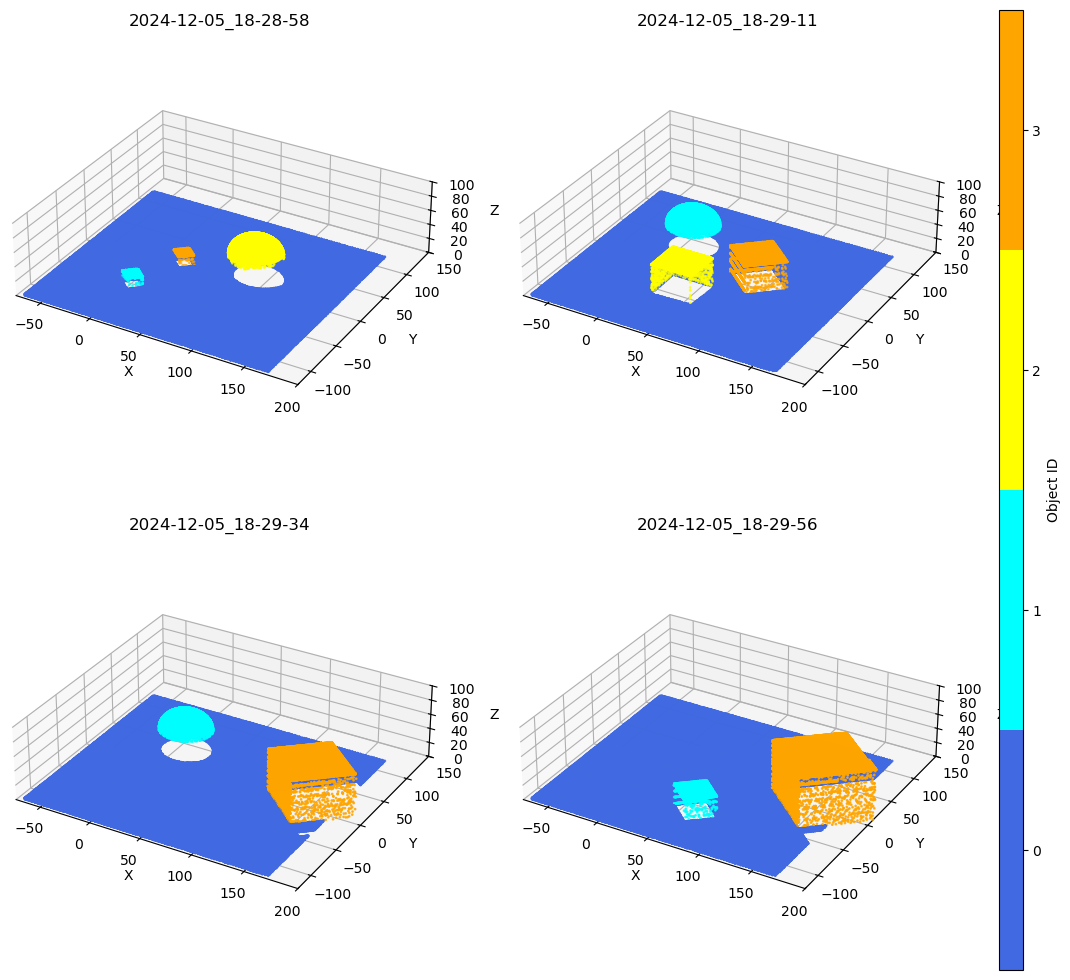

In [9]:
# create figure with 4 panels and 3d axes
fig = plt.figure(figsize=(12, 12))
last_pc = sim_dict["pcs"][-1]
box = (np.ptp(last_pc[:, 0]), np.ptp(last_pc[:, 1]), np.ptp(last_pc[:, 2]))

# color map configuration
lower = 0
upper = 3
n = 4
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "sceneparts", ["royalblue", "cyan", "yellow", "orange"], N=n
)
cmap._init()
norm = mpl.colors.Normalize()
deltac = (upper - lower) / (2 * (n - 1))

for i, (pc, obj_id, name) in enumerate(
    zip(sim_dict["pcs"], sim_dict["object_ids"], sim_dict["name"])
):
    if pc.size == 0:
        continue
    # plot points in 3D with color based on object id in the respecitve panel
    ax = fig.add_subplot(2, 2, i + 1, projection="3d")
    ax.scatter(pc[::5, 0], pc[::5, 1], pc[::5, 2], c=obj_id[::5], cmap=cmap, s=1)
    # set equal axes
    ax.set_box_aspect(box)
    # set limits and labels
    ax.set_xlim(-75, 200)
    ax.set_xlabel("X")
    ax.set_ylim(-125, 150)
    ax.set_ylabel("Y")
    ax.set_zlim(0, 100)
    ax.set_zlabel("Z")
    ax.set_title(name)

mapper = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array([lower - deltac, upper + deltac])
ax2 = fig.add_axes([0.95, 0.1, 0.02, 0.8])
cbar = fig.colorbar(
    mapper, cax=ax2, orientation="vertical", label="Object ID", ticks=[0, 1, 2, 3]
)
plt.show()